# Assignment 2: Machine Learning

In this assignment we are looking at case 1, predicting stock market price for Tesla. As we are interested in predicting the spesific price for a given time, it would make more sense to use a regression based algorithm. However if we were trying to predict wether or not the price would rise or fall we could use a classification model to classify an incline or decline in price given a time period. But the task is to predict value of stock for a spesific point in time, so we'll apply a regression model.

In [212]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [213]:
#importing data
df=pd.read_csv("TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [214]:
#getting rid of NaN values
df.replace(0, np.nan, inplace=True)
df.dropna(inplace = True)

#converting date from string to float
df['Date']=pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(dt.datetime.toordinal)

#defining values we want to run training on
X = pd.DataFrame(df["Date"]) 
y = pd.DataFrame(df["Close"]) 

#Splitting data into training and test data. 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [215]:
lr = LinearRegression().fit(X_train, y_train)  # perform linear regression

Y_pred = lr.predict(X_train) #training data prediction
Y_test_pred = lr.predict(X_test)   #predicting y_test values from x_test    

# Plotting graphs for trained model and test model

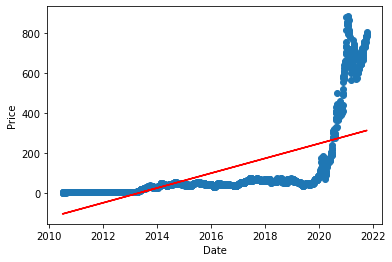

MSE = 20801.45043895163
Score = 0.4104632393594554


In [216]:
#plotting results training
date_fix = X_train["Date"].apply(dt.datetime.fromordinal) #changing dates back to standard format
plt.scatter(date_fix, y_train)             #scatter plot of dataset used for training
plt.plot(date_fix, Y_pred, color='red')    #linear plot of predicted values in training data
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()  
print( "MSE = "+str(metrics.mean_squared_error(y_train,Y_pred)))#Showing mean squared error
print("Score = "+str(lr.score(X_train, y_train)))               #Showing score

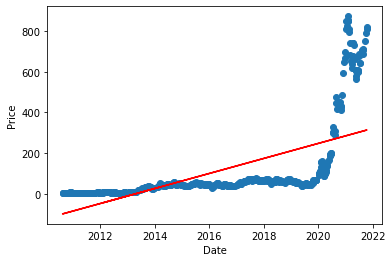

MSE = 21703.90697246559
Score = 0.413460104544645


In [217]:
#plotting results of test
date_fix = X_test["Date"].apply(dt.datetime.fromordinal)      

plt.scatter(date_fix, y_test)               #scatter plot of test data  
plt.plot(date_fix, Y_test_pred, color='red')   #linear plot of predicted values from test data
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()                                
print( "MSE = "+str(metrics.mean_squared_error(y_test,Y_test_pred)))
print("Score = "+str(lr.score(X_test, y_test)))

In [235]:
Datein=dt.date(2021,2,23) #Chosen date 
DateinOrd=Datein.toordinal()  #changing to string format

date_pred=lr.predict([[DateinOrd]])  #predicting value for date
print("Actual Value for 02:23:2021: 698.84 USD. Predicted value:", date_pred[0][0], "USD.")



Actual Value for 02,23,2021: 698.84 USD. Predicted value: 659.5707852483029 USD.


As we can see, our predicion using a linear regression model does not give a very accurate predictor for price given a spesific date with high volatility or large outliers. However, if we narrow the timeframe to just one year, we would expect to get a closer predicion.

In [219]:
df2=pd.read_csv("TSLA2.csv")   #importing dataset with values going back one year

df2.replace(0, np.nan, inplace=True)
df2.dropna(inplace = True)


df2['Date']=pd.to_datetime(df2['Date'])
df2['Date']=df2['Date'].map(dt.datetime.toordinal)


X2 = pd.DataFrame(df2["Date"]) 
y2 = pd.DataFrame(df2["Close"]) 

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42) 

In [226]:
lr = LinearRegression().fit(X2_train, y2_train) 
Y2_pred = lr.predict(X2_test)

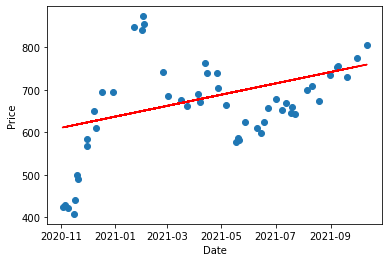

MSE = 10234.7315518291
Score = 0.17079670456618923


In [221]:
date_fix = X2_test["Date"].apply(dt.datetime.fromordinal)
Y2_pred = lr.predict(X2_test)
plt.scatter(date_fix, y2_test)             
plt.plot(date_fix, Y2_pred, color='red')   
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()                                
print( "MSE = "+str(metrics.mean_squared_error(y2_test,Y2_pred)))
print("Score = "+str(lr.score(X2_test, y2_test)))

We see the stock price prediction when using a single year yields a better MSE. A non-linear model would work better for this type of value prediction.